In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("dark_background")

In [3]:
"""
All functions in this cell.
"""


def initilize_system(L):
    # Initializing a random 2D Ising lattice:
    lattice = 2 * np.random.randint(low=0, high=2, size=(L,L)) - 1
    return lattice


def Metropolis(lattice, beta, num_steps=10_000):
    # Monte Carlo move using Metropolis algorithm.
    # Similar to https://web.northeastern.edu/afeiguin/phys5870/phys5870/node80.html
    Ws = np.exp(-beta * np.array([-8, -4, 0, 4, 8]))
    length = lattice.shape[0]
    width = lattice.shape[1]
    index0 = np.random.randint(low=0, high=length, size=num_steps, dtype=int)
    index1 = np.random.randint(low=0, high=width, size=num_steps, dtype=int)
    for i,j in zip(index0, index1):
        delta_E = 2 * lattice[i,j] * (lattice[(i+1)%length,j] +
                                        lattice[(i-1)%length,j] +
                                        lattice[i,(j+1)%width] +
                                        lattice[i,(j-1)%width])
        if delta_E < 0:
            # Flip spin at i,j
            lattice[i,j] *= -1
        elif np.random.uniform(0,1) <= Ws[(delta_E+8)//4]:
            # Flip spin at i,j
            lattice[i,j] *= -1
    return lattice


def energy(lattice, J=1, H=0):
    PBC_lattice = np.zeros(shape=(lattice.shape[0]+2, lattice.shape[1]+2))
    # Periodic boundary condition:
    PBC_lattice[1:-1, 1:-1] = lattice  # Center of PBC_lattice
    PBC_lattice[0, 1:-1] = lattice[-1]  # Top
    PBC_lattice[-1, 1:-1] = lattice[0]  # Bottom
    PBC_lattice[1:-1, 0] = lattice[:, -1]  # Left
    PBC_lattice[1:-1, -1] = lattice[:, 0]  # Right
    energy = np.sum(-J * PBC_lattice[1:-1, 1:-1] * \
                    (PBC_lattice[1:-1, :-2] + PBC_lattice[1:-1, 2:] + PBC_lattice[:-2, 1:-1] + PBC_lattice[2:, 1:-1]))
    # + (-H) * np.sum(lattice)
    # This is equivalent to the more readable code below:
    # lattice_center = PBC_lattice[1:-1, 1:-1]
    # latticeleft = PBC_lattice[1:-1, :-2]
    # latticeright = PBC_lattice[1:-1, 2:]
    # latticeup = PBC_lattice[:-2, 1:-1]
    # latticebottom = PBC_lattice[2:, 1:-1]
    # energy = np.sum(-J * lattice_center * (latticeleft + latticeright + latticeup + latticebottom))
    return energy


def magnetization(lattice):
    # Magnetization or magnetization per site for a given lattice:
    return np.abs(np.sum(lattice))#, abs(np.mean(lattice))

$\Large Visualization \ for \ \beta = 0.1$

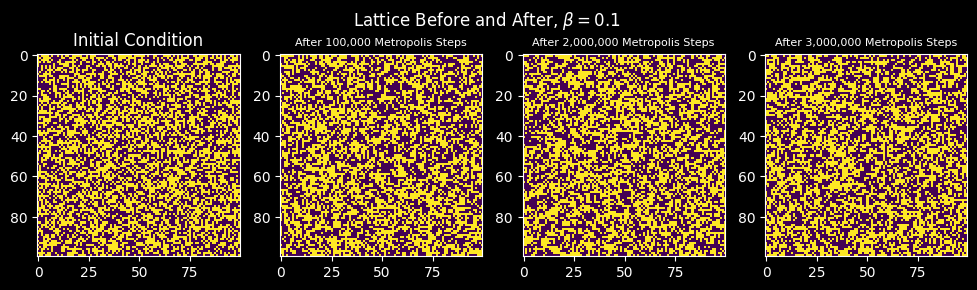

In [4]:
# Takes 18 seconds
beta = 0.1
fig0, ax0 = plt.subplots(1,4, figsize=(12, 3))
fig0.suptitle(f"Lattice Before and After, $\\beta={beta}$")
lattice = initilize_system(100)
ax0[0].imshow(lattice, interpolation="None")
ax0[0].set_title("Initial Condition")

lattice = Metropolis(lattice, beta=beta)
ax0[1].imshow(lattice, interpolation="None")
ax0[1].set_title("After 100,000 Metropolis Steps", fontsize=8)

lattice = Metropolis(lattice, beta=beta, num_steps=2_000_000)
ax0[2].imshow(lattice, interpolation="None")
ax0[2].set_title("After 2,000,000 Metropolis Steps", fontsize=8)

lattice = Metropolis(lattice, beta=beta, num_steps=3_000_000)
ax0[3].imshow(lattice, interpolation="None")
ax0[3].set_title("After 3,000,000 Metropolis Steps", fontsize=8);

In [5]:
# fig0.savefig("Visualization01.jpg")

$\Large Visualization \ for \ \beta = 0.3$

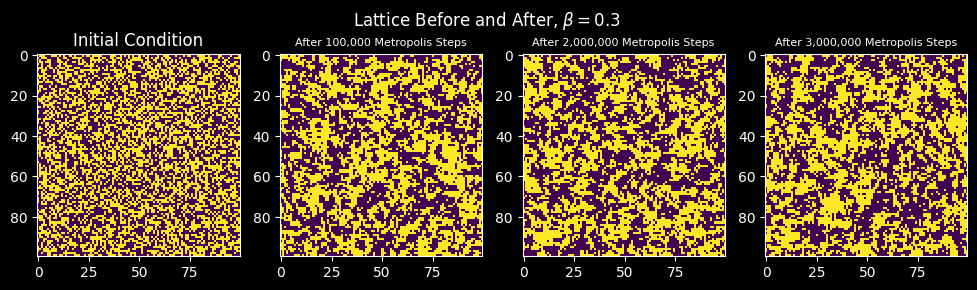

In [6]:
# Takes 18 seconds
beta = 0.3
fig0, ax0 = plt.subplots(1,4, figsize=(12, 3))
fig0.suptitle(f"Lattice Before and After, $\\beta={beta}$")
lattice = initilize_system(100)
ax0[0].imshow(lattice, interpolation="None")
ax0[0].set_title("Initial Condition")

lattice = Metropolis(lattice, beta=beta)
ax0[1].imshow(lattice, interpolation="None")
ax0[1].set_title("After 100,000 Metropolis Steps", fontsize=8)

lattice = Metropolis(lattice, beta=beta, num_steps=2_000_000)
ax0[2].imshow(lattice, interpolation="None")
ax0[2].set_title("After 2,000,000 Metropolis Steps", fontsize=8)

lattice = Metropolis(lattice, beta=beta, num_steps=3_000_000)
ax0[3].imshow(lattice, interpolation="None")
ax0[3].set_title("After 3,000,000 Metropolis Steps", fontsize=8);

In [7]:
# fig0.savefig("Visualization03.jpg")

$\Large Visualization \ for \ \beta = 0.48$

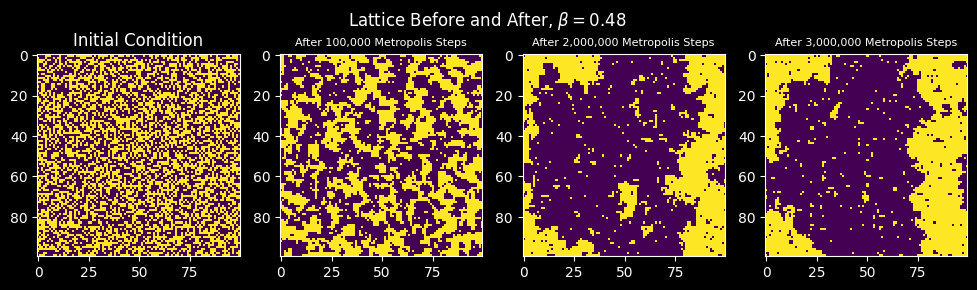

In [8]:
# Takes 18 seconds
beta = 0.48
fig0, ax0 = plt.subplots(1,4, figsize=(12, 3))
fig0.suptitle(f"Lattice Before and After, $\\beta={beta}$")
lattice = initilize_system(100)
ax0[0].imshow(lattice, interpolation="None")
ax0[0].set_title("Initial Condition")

lattice = Metropolis(lattice, beta=beta)
ax0[1].imshow(lattice, interpolation="None")
ax0[1].set_title("After 100,000 Metropolis Steps", fontsize=8)

lattice = Metropolis(lattice, beta=beta, num_steps=2_000_000)
ax0[2].imshow(lattice, interpolation="None")
ax0[2].set_title("After 2,000,000 Metropolis Steps", fontsize=8)

lattice = Metropolis(lattice, beta=beta, num_steps=3_000_000)
ax0[3].imshow(lattice, interpolation="None")
ax0[3].set_title("After 3,000,000 Metropolis Steps", fontsize=8);

In [9]:
# fig0.savefig("Visualization048_3.jpg")

$\Large Visualization \ for \ \beta = 0.5$

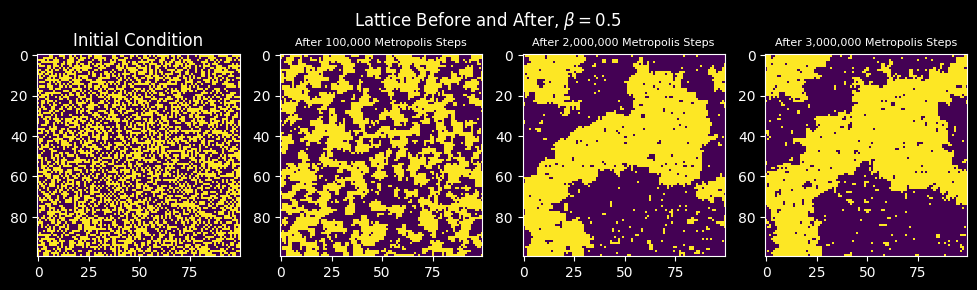

In [10]:
# Takes 18 seconds
beta = 0.5
fig0, ax0 = plt.subplots(1,4, figsize=(12, 3))
fig0.suptitle(f"Lattice Before and After, $\\beta={beta}$")
lattice = initilize_system(100)
ax0[0].imshow(lattice, interpolation="None")
ax0[0].set_title("Initial Condition")

lattice = Metropolis(lattice, beta=beta)
ax0[1].imshow(lattice, interpolation="None")
ax0[1].set_title("After 100,000 Metropolis Steps", fontsize=8)

lattice = Metropolis(lattice, beta=beta, num_steps=2_000_000)
ax0[2].imshow(lattice, interpolation="None")
ax0[2].set_title("After 2,000,000 Metropolis Steps", fontsize=8)

lattice = Metropolis(lattice, beta=beta, num_steps=3_000_000)
ax0[3].imshow(lattice, interpolation="None")
ax0[3].set_title("After 3,000,000 Metropolis Steps", fontsize=8);

In [11]:
# fig0.savefig("Visualization05.jpg")

$\Large Visualization \ for \ \beta = 0.6$

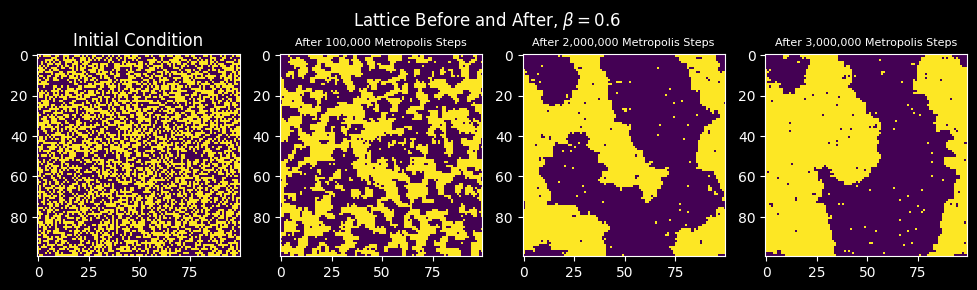

In [12]:
# Takes 18 seconds
beta = 0.6
fig0, ax0 = plt.subplots(1,4, figsize=(12, 3))
fig0.suptitle(f"Lattice Before and After, $\\beta={beta}$")
lattice = initilize_system(100)
ax0[0].imshow(lattice, interpolation="None")
ax0[0].set_title("Initial Condition")

lattice = Metropolis(lattice, beta=beta)
ax0[1].imshow(lattice, interpolation="None")
ax0[1].set_title("After 100,000 Metropolis Steps", fontsize=8)

lattice = Metropolis(lattice, beta=beta, num_steps=2_000_000)
ax0[2].imshow(lattice, interpolation="None")
ax0[2].set_title("After 2,000,000 Metropolis Steps", fontsize=8)

lattice = Metropolis(lattice, beta=beta, num_steps=3_000_000)
ax0[3].imshow(lattice, interpolation="None")
ax0[3].set_title("After 3,000,000 Metropolis Steps", fontsize=8);

In [13]:
# fig0.savefig("Visualization06.jpg")

$\Large Visualization \ for \ \beta = 0.9$

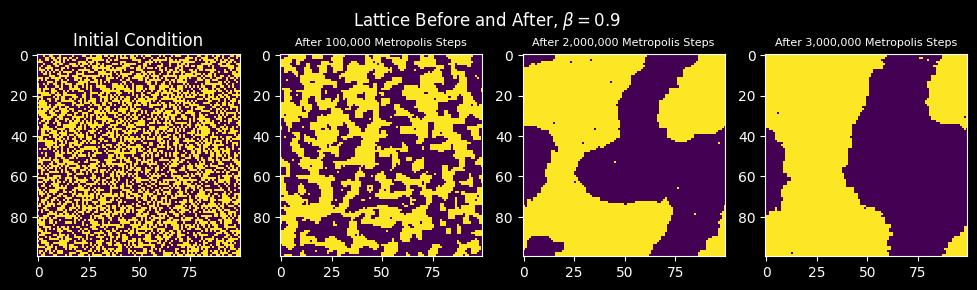

In [14]:
# Takes 18 seconds
beta = 0.9
fig0, ax0 = plt.subplots(1,4, figsize=(12, 3))
fig0.suptitle(f"Lattice Before and After, $\\beta={beta}$")
lattice = initilize_system(100)
ax0[0].imshow(lattice, interpolation="None")
ax0[0].set_title("Initial Condition")

lattice = Metropolis(lattice, beta=beta)
ax0[1].imshow(lattice, interpolation="None")
ax0[1].set_title("After 100,000 Metropolis Steps", fontsize=8)

lattice = Metropolis(lattice, beta=beta, num_steps=2_000_000)
ax0[2].imshow(lattice, interpolation="None")
ax0[2].set_title("After 2,000,000 Metropolis Steps", fontsize=8)

lattice = Metropolis(lattice, beta=beta, num_steps=3_000_000)
ax0[3].imshow(lattice, interpolation="None")
ax0[3].set_title("After 3,000,000 Metropolis Steps", fontsize=8);

In [15]:
# fig0.savefig("Visualization09.jpg")

$\Large C_v, \ \chi, \ \left|\left<M\right>\right|, \ \xi$

In [16]:
# Different sizes of lattice:
different_Ls = [16, 80, 120, 200]
# Number of Monte Carlo sweeps to reach equilibration for beta=0.1.
# After that, since the temperature in decreased slowly, there is no need for equilibration sweeps.
# So this is used for each L, only once at the start of initilization:
equilibration_sweeps = 100_000
# After reaching equilibrium, for each beta, this many samples are drawn from the system:
ensemble_size = 50
# 37 different betas from 0.1 to 1, with more focus in the interval (0.4, 0.5):
different_betas = np.append(np.append(np.arange(0.1, 0.4, 0.05), np.arange(0.4, 0.5, 0.005)), np.arange(0.5, 1, 0.05))
# Number of temperature points:
nt = len(different_betas)
# These matrices will contain data for different Ls and betas:
energy_matrix = np.zeros((len(different_Ls), nt))
magnetization_matrix = np.zeros((len(different_Ls), nt))
Cv_matrix = np.zeros((len(different_Ls), nt))
xi_matrix = np.zeros((len(different_Ls), nt))

In [ ]:
# Takes 8 minutes:
for i in range(len(different_Ls)):
    L = different_Ls[i]
    # print(L, "<<<<<<<<<<<<<<<")
    n1, n2  = 1.0/(ensemble_size*L*L), 1.0/(ensemble_size*ensemble_size*L*L)
    lattice = initilize_system(L)
    lattice = Metropolis(lattice, beta=different_betas[0], num_steps=equilibration_sweeps)
    for j in range(nt):
        E = M = E2 = M2 = 0
        beta = different_betas[j]
        for _ in range(ensemble_size):
            lattice = Metropolis(lattice, beta, num_steps=L*L)
            Ene = energy(lattice)  # Calculate the energy
            Mag = magnetization(lattice)  # Calculate the magnetization
            E += Ene
            M += Mag
            M2 += Mag * Mag 
            E2 += Ene * Ene
        

        energy_matrix[i,j] = n1*E
        magnetization_matrix[i,j] = n1*M
        Cv_matrix[i,j] = (n1*E2 - n2*E*E) * beta * beta
        xi_matrix[i,j] = (n1*M2 - n2*M*M) * beta
        # print(f"{(j+1)/nt*100:.2f} %")

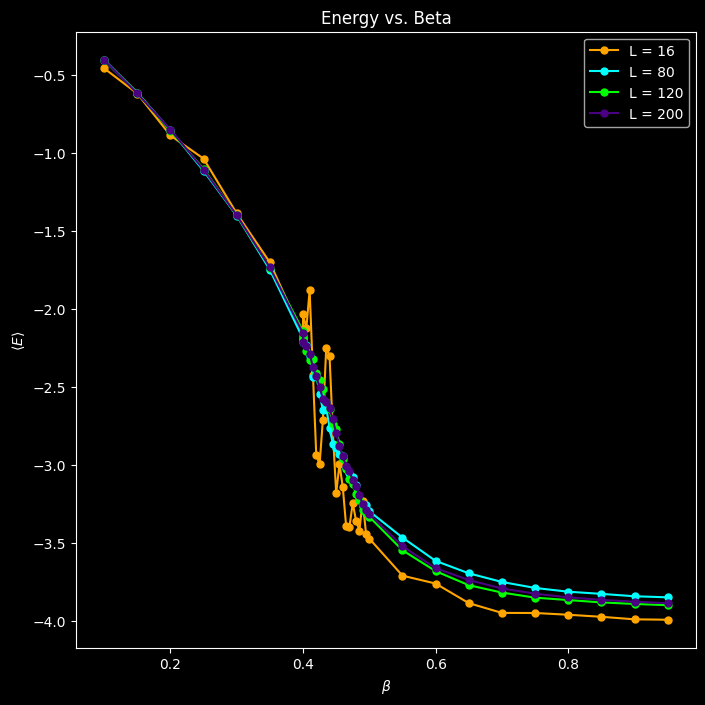

In [19]:
fig1, ax1 = plt.subplots(figsize=(8,8))
ax1.plot(different_betas, energy_matrix[0], ms=5, marker='o', color='orange', label="L = 16")
ax1.plot(different_betas, energy_matrix[1], ms=5, marker='o', color='cyan', label="L = 80")
ax1.plot(different_betas, energy_matrix[2], ms=5, marker='o', color='lime', label="L = 120")
ax1.plot(different_betas, energy_matrix[3], ms=5, marker='o', color='indigo', label="L = 200")
ax1.set_title("Energy vs. Beta")
ax1.set_xlabel("$\\beta$")
ax1.set_ylabel("$\left<E\\right>$")
ax1.legend();

In [20]:
# fig1.savefig("EnergyPlot.jpg")

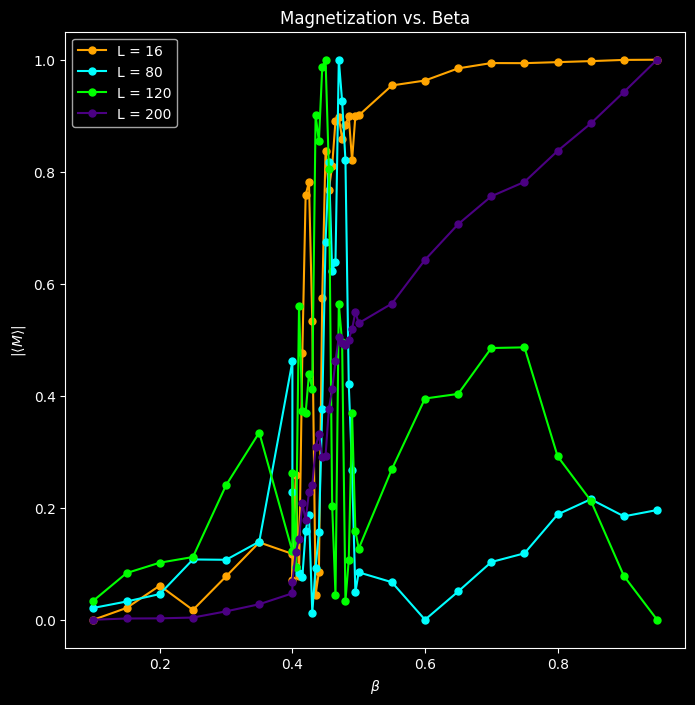

In [32]:
fig1, ax1 = plt.subplots(figsize=(8,8))
normalized_magnetization_matrix = np.zeros_like(magnetization_matrix)
for i in range(len(different_Ls)):
    normalized_magnetization_matrix[i] = (np.abs(magnetization_matrix[i]) - np.abs(magnetization_matrix[i]).min())\
                            / (np.abs(magnetization_matrix[i]).max() - np.abs(magnetization_matrix[i]).min())
ax1.plot(different_betas, normalized_magnetization_matrix[0], ms=5, marker='o', color='orange', label="L = 16")
ax1.plot(different_betas, normalized_magnetization_matrix[1], ms=5, marker='o', color='cyan', label="L = 80")
ax1.plot(different_betas, normalized_magnetization_matrix[2], ms=5, marker='o', color='lime', label="L = 120")
ax1.plot(different_betas, normalized_magnetization_matrix[3], ms=5, marker='o', color='indigo', label="L = 200")
ax1.set_title("Magnetization vs. Beta")
ax1.set_xlabel("$\\beta$")
ax1.set_ylabel("$\left|\left<M\\right>\\right|$")
ax1.legend();

In [33]:
# fig1.savefig("MagnetizationPlot.jpg")

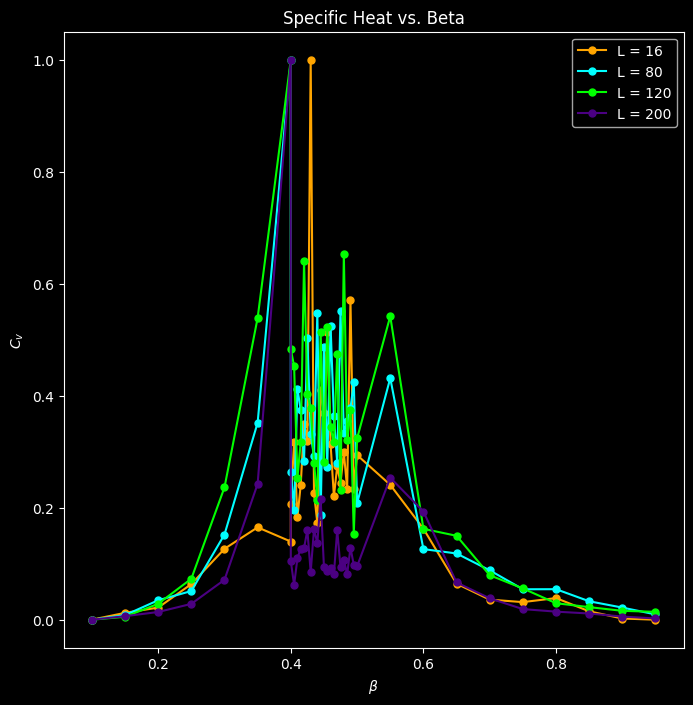

In [23]:
fig1, ax1 = plt.subplots(figsize=(8,8))
normalized_Cv_matrix = np.zeros_like(Cv_matrix)
for i in range(len(different_Ls)):
    normalized_Cv_matrix[i] = (np.abs(Cv_matrix[i]) - np.abs(Cv_matrix[i]).min())\
                            / (np.abs(Cv_matrix[i]).max() - np.abs(Cv_matrix[i]).min())
ax1.plot(different_betas, normalized_Cv_matrix[0], ms=5, marker='o', color='orange', label="L = 16")
ax1.plot(different_betas, normalized_Cv_matrix[1], ms=5, marker='o', color='cyan', label="L = 80")
ax1.plot(different_betas, normalized_Cv_matrix[2], ms=5, marker='o', color='lime', label="L = 120")
ax1.plot(different_betas, normalized_Cv_matrix[3], ms=5, marker='o', color='indigo', label="L = 200")
ax1.set_title("Specific Heat vs. Beta")
ax1.set_xlabel("$\\beta$")
ax1.set_ylabel("$C_v$")
ax1.legend();

In [24]:
# fig1.savefig("CvPlot.jpg")

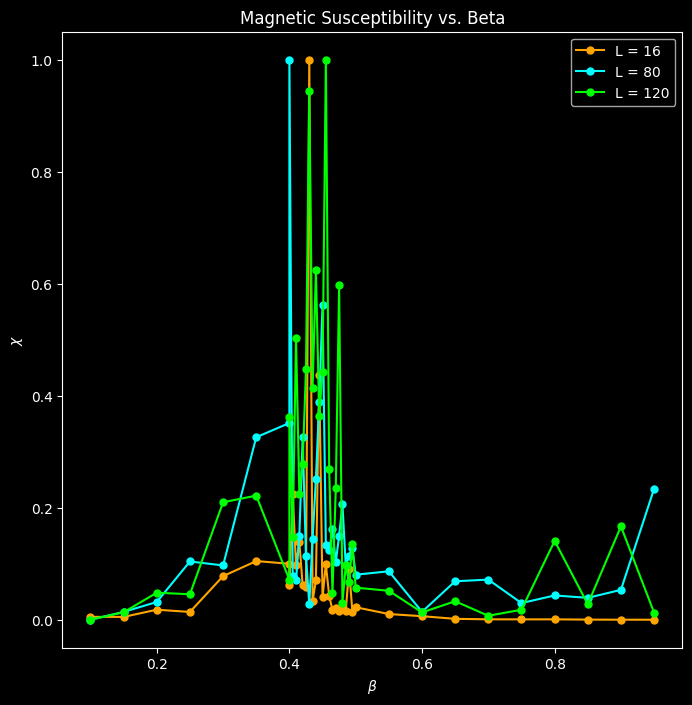

In [29]:
fig1, ax1 = plt.subplots(figsize=(8,8))
normalized_xi_matrix = np.zeros_like(xi_matrix)
for i in range(len(different_Ls)):
    normalized_xi_matrix[i] = (np.abs(xi_matrix[i]) - np.abs(xi_matrix[i]).min())\
                            / (np.abs(xi_matrix[i]).max() - np.abs(xi_matrix[i]).min())
ax1.plot(different_betas, normalized_xi_matrix[0], ms=5, marker='o', color='orange', label="L = 16")
ax1.plot(different_betas, normalized_xi_matrix[1], ms=5, marker='o', color='cyan', label="L = 80")
ax1.plot(different_betas, normalized_xi_matrix[2], ms=5, marker='o', color='lime', label="L = 120")
# This one was faulty:
# ax1.plot(different_betas, normalized_xi_matrix[3], ms=5, marker='o', color='indigo', label="L = 200")
ax1.set_title("Magnetic Susceptibility vs. Beta")
ax1.set_xlabel("$\\beta$")
ax1.set_ylabel("$\chi$")
ax1.legend();

In [30]:
# fig1.savefig("XiPlot.jpg")